In [1]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist


import sys
sys.path.append("../..")
from functools import partial

from analyzer.dumperReader.reader import *
from analyzer.driver.fileTools import *
from analyzer.driver.computations import *
from analyzer.computations.CPToSupercls import CPToSuperclusterProperties
from analyzer.computations.tracksters import tracksters_seedProperties, CPtoTrackster_properties
from analyzer.energy_resolution.fit import *

In [2]:
dumperInput = DumperInputManager([
    "/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/",
    #"/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/", "/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v7/"
    ], 
                                limitFileCount=None, #restrictToAvailableDumperTypes=[DumperType.TICL, DumperType.TICLsupercls]
                                )

In [3]:
dumperInput.inputReaders

[SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_206.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_206.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_215.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_215.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_217.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_217.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_203.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v4/ticlDumper_203.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/al

In [4]:
res = runComputations([CPToSuperclusterProperties, CPtoTrackster_properties], dumperInput, max_workers=10)
CPtoSC_df = res[0]
CPtoTs_df = res[1]

  0%|          | 0/20 [00:00<?, ?it/s]

An exception occured during processing of a sample. Exception details are : 
(KeyInFileError('superclusteredTracksters'), KeyInFileError('superclusteredTracksters'))


ValueError: not enough values to unpack (expected 2, got 0)

In [14]:
CPtoSC_df

supercls_id  raw_energy_seed  \
eventInternal caloparticle_id                                 
0             0                        526        98.548363   
              1                       1681        87.645630   
1             0                        510        17.185516   
              1                       1625        20.855995   
2             0                          0       217.079102   
...                                    ...              ...   
1197          1                       1952        93.930611   
1198          0                        550       227.628784   
              1                       1981       239.505859   
1199          0                        482        23.679556   
              1                       2007        56.745335   

                               raw_em_energy_seed  regressed_energy_seed  \
eventInternal caloparticle_id                                              
0             0                         98.548363             104.574120   
              1                         87.645630              92.672760   
1             0                         17.185516              19.370564   
              1                         20.855995              25.278505   
2             0                        217.079102             230.494659   
...                                           ...                    ...   
1197          1                         93.930611             101.084518   
1198          0                        226.895859             241.781647   
              1                        239.505859             255.403625   
1199          0                         23.679556              25.677824   
              1                         56.745335              60.353123   

                               raw_pt_seed  barycenter_eta_seed  \
eventInternal caloparticle_id                                     
0             0                  18.611877            -2.224611   
              1                  21.870285             2.222363   
1             0                   3.776060            -2.435875   
              1                   5.166434             2.430995   
2             0                  64.672417            -1.812434   
...                                    ...                  ...   
1197          1                  33.272804             1.683985   
1198          0                  32.562534            -2.658221   
              1                  31.181705             2.658090   
1199          0                   4.220152            -2.575772   
              1                   9.772281             2.582501   

                               raw_energy_supercls_sum  \
eventInternal caloparticle_id                            
0             0                              98.548363   
              1                              87.645630   
1             0                              17.185516   
              1                              20.855995   
2             0                             223.463501   
...                                                ...   
1197          1                              93.930611   
1198          0                             227.628784   
              1                             239.505859   
1199          0                              23.679556   
              1                              56.745335   

                               raw_em_energy_supercls_sum  \
eventInternal caloparticle_id                               
0             0                                 98.548363   
              1                                 87.645630   
1             0                                 17.185516   
              1                                 20.855995   
2             0                                223.463501   
...                                                   ...   
1197          1                                 93.930611   
1198          0                               

In [15]:
CPtoTs_df

ts_id     score     sharedE  raw_energy  \
eventInternal caloparticle_id                                            
0             0                  525  0.012514   89.955589   98.548363   
              1                 1685  0.014606   82.601891   87.645630   
1             0                  508  0.649694    6.806921   17.185516   
              1                 1627  0.520706    8.848873   20.855995   
2             0                  566  0.007512  212.141251  217.079102   
...                              ...       ...         ...         ...   
1197          1                 1956  0.011725   93.221123   93.930611   
1198          0                  548  0.021593  199.637955  227.628784   
              1                 1983  0.011930  212.982147  239.505859   
1199          0                  481  0.471061   21.659708   23.679556   
              1                 2010  0.191159   39.025173   56.745335   

                               raw_em_energy  regressed_energy     raw_pt  \
eventInternal caloparticle_id                                               
0             0                    98.548363        104.574120  18.611877   
              1                    87.645630         92.672760  21.870285   
1             0                    17.185516         19.370564   3.776060   
              1                    20.855995         25.278505   5.166434   
2             0                   217.079102        230.494659  64.672417   
...                                      ...               ...        ...   
1197          1                    93.930611        101.084518  33.272804   
1198          0                   226.895859        241.781647  32.562534   
              1                   239.505859        255.403625  31.181705   
1199          0                    23.679556         25.677824   4.220152   
              1                    56.745335         60.353123   9.772281   

                               raw_em_pt  barycenter_eta  regressed_energy_CP  \
eventInternal caloparticle_id                                                   
0             0                18.611877       -2.224611           107.580376   
              1                21.870285        2.222363           107.580376   
1             0                 3.776060       -2.435875            18.844957   
              1                 5.166434        2.430995            18.844957   
2             0                64.672417       -1.812434           269.771271   
...                                  ...             ...                  ...   
1197          1                33.272804        1.683985           106.512459   
1198          0                32.457687       -2.658221           254.684662   
              1                31.181705        2.658090           254.684662   
1199          0                 4.220152       -2.575772            55.282429   
              1                 9.772281        2.582501            55.282429   

                               raw_energy_CP  barycenter_x  barycenter_y  \
eventInternal caloparticle_id                                              
0             0                   104.765625    -42.352009    -59.829536   
              1                   105.196739     43.423904     56.812458   
1             0                    17.705984     53.449440     15.886662   
              1                    18.799911    -57.867149     -2.756459   
2             0                   263.279999     99.441956     48.698368   
...                                      ...           ...           ...   
1197          1                   108.103210    126.654755    -13.782356   
1198          0                   246.444305      0.665519     47.123817   
              1                   251.976242     -1.224491    -47.098793   
1199          0                    53.242092     40.287880     30.105593   
              1                    55.531883    -42.762852    -27.236599   

                       

In [16]:
#store = pd.HDFStore("/workspaces/repo/scratch/analyzer-test/store.hdf", mode="r")
#store = pd.HDFStore("/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v1/store-v1/store.hdf", mode="r")

#df = store["CPToSupercluster"]
#df

In [17]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))
histedges_equalN(CPtoTs_df.raw_pt, 8)

array([ 0.44310403, 11.1124773 , 22.24588013, 33.6908989 , 46.09572983,
       58.14405441, 68.64176178, 80.66372681, 97.74741364])

In [18]:
h_scOverCP_energy = hist.Hist(eratio_axis(label="Supercluster energy / CaloParticle energy"))
h_scOverCP_energy.fill(CPtoSC_df.regressed_energy_supercls_sum/CPtoSC_df.regressed_energy_CP)

Hist(Regular(100, 0, 2, name='e_ratio', label='Supercluster energy / CaloParticle energy'), storage=Double()) # Sum: 2400.0

In [19]:
h_seedOverCP_energy = hist.Hist(eratio_axis(label="Seed trackster energy / CaloParticle energy"))
h_seedOverCP_energy.fill(CPtoTs_df.regressed_energy/CPtoTs_df.regressed_energy_CP)


Hist(Regular(100, 0, 2, name='e_ratio', label='Seed trackster energy / CaloParticle energy'), storage=Double()) # Sum: 2400.0

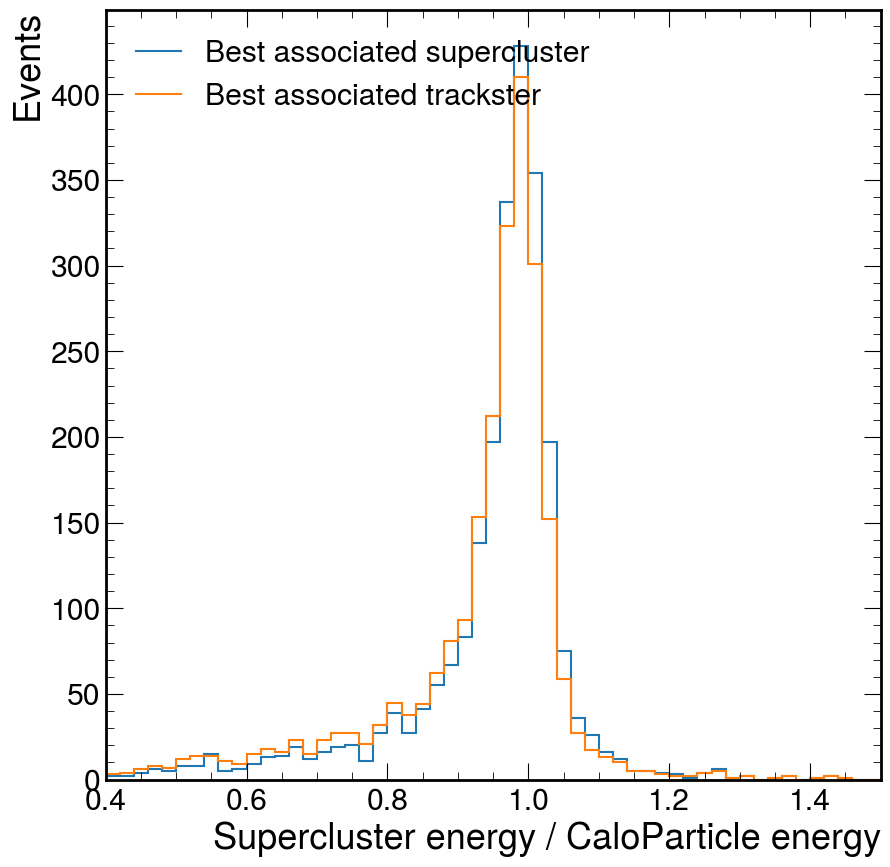

In [20]:

hep.histplot([h_scOverCP_energy, h_seedOverCP_energy], label=["Best associated supercluster", "Best associated trackster"], yerr=False, flow="none")
plt.xlim(0.4, 1.5)
plt.ylabel("Events")
plt.legend(loc="upper left")

TypeError: cannot unpack non-iterable CruijffFitResult object

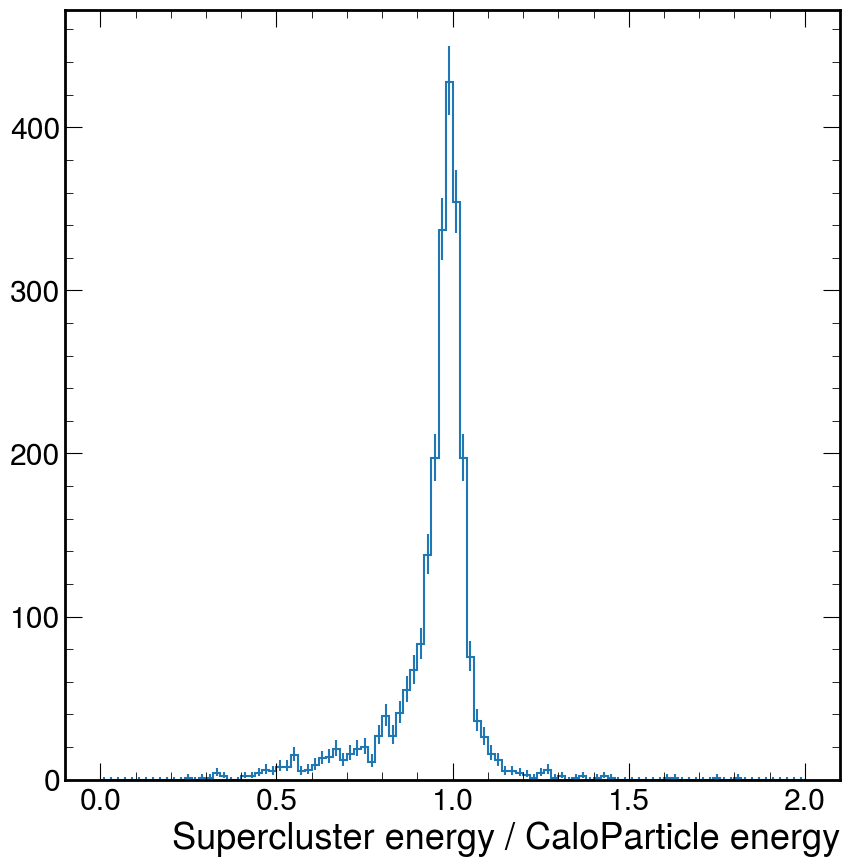

In [21]:
plt.figure()
hep.histplot([h_scOverCP_energy], label=["Best associated\nsupercluster", "Best associated trackster"])
param_optimised,__name__ = fitCruijff(h_scOverCP_energy)
x_plotFct = np.linspace(h_scOverCP_energy.axes[0].centers[0], h_scOverCP_energy.axes[0].centers[-1],500)
plt.plot(x_plotFct,cruijff(x_plotFct,*param_optimised), label=f"Cruijff fit\n$\sigma={(param_optimised[2]+param_optimised[3])/2:.3f}$")
plt.ylabel("Events")
plt.legend()

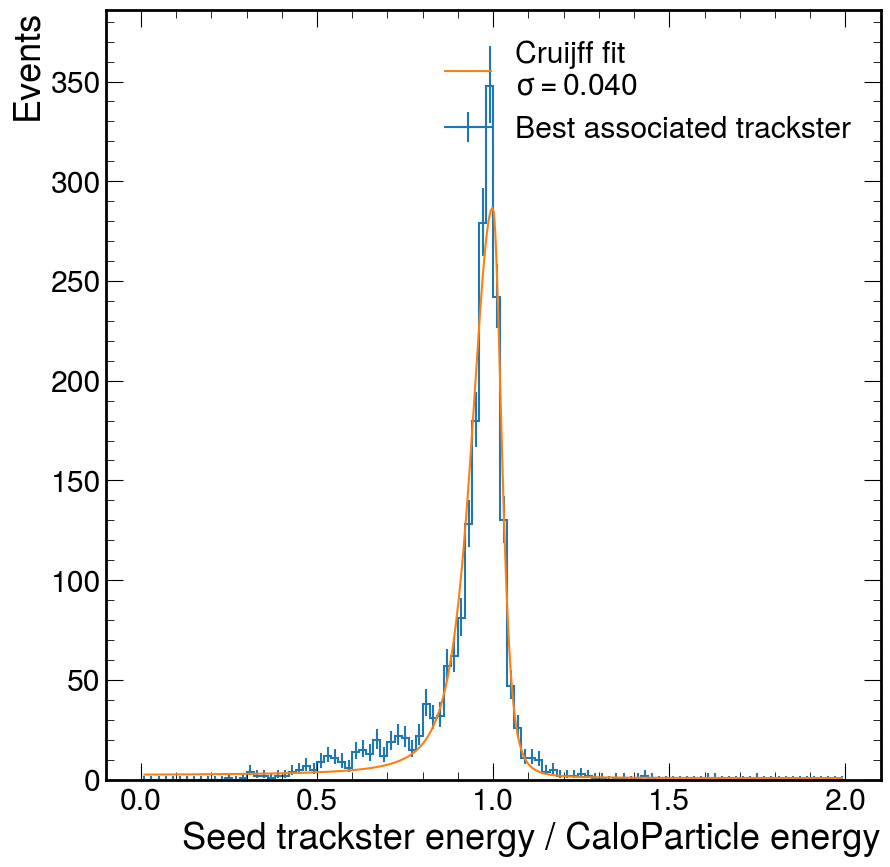

In [ ]:
plt.figure()
hep.histplot([h_seedOverCP_energy], label=["Best associated trackster"])
param_optimised,__name__ = fitCruijff(h_seedOverCP_energy)
x_plotFct = np.linspace(h_seedOverCP_energy.axes[0].centers[0], h_seedOverCP_energy.axes[0].centers[-1],500)
plt.plot(x_plotFct,cruijff(x_plotFct,*param_optimised), label=f"Cruijff fit\n$\sigma={(param_optimised[2]+param_optimised[3])/2:.3f}$")
plt.ylabel("Events")
plt.legend()